## 二分类问题案例 - 电影评论分类

在这个例子中，你将学习根据电影评论的文字内容将其划分为正面或负面。

### IMDB 数据集

IMDB 数据集，它包含来自互联网电影数据库（IMDB）的 50 000 条严重两极分化的评论。数据集被分为用于训练的 25 000 条评论与用于测试的 25 000 条评论，训练集和测试集都包含 50% 的正面评论和 50% 的负面评论。

IMDB 数据集也内置于 Keras 库。它已经过预处理：评论（单词序列）已经被转换为整数序列，其中每个整数代表字典中的某个单词。

参数 num_words=10000 的意思是仅保留训练数据中前 10 000 个最常出现的单词。低频单词将被舍弃。
- train_data 和 test_data 这两个变量都是评论组成的列表
    - 每条评论又是单词索引组成的列表（表示一系列单词）
    - 里面的单词又用数值化了，比如‘a’ = 1
    - 通过统计该单词出现的次数来排序，顺序的数值就用来代表该数据
- train_labels 和 test_labels 都是 0 和 1 组成的列表，其中 0代表负面（negative），1 代表正面（positive）


In [9]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [2]:
#查看导入的数据
print( [word for word in train_data[0] if word > 5000])
print(train_data[0])
print(train_labels[0])

[5244, 5952, 7486, 5535, 5345]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [9]:
 #获取具体的单词
word_index = imdb.get_word_index(path='imdb_word_index.json')
    
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decode_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 准备数据

需要将列表转换为张量
- **填充列表：**使其具有相同的长度，再将列表转换成形状为 (samples, word_indices)的整数张量

- **one-hot 编码：**将其转换为 0 和 1 组成的向量。例如，序列 [3, 5] 将会被转换为 10 000 维向量，只有索引为 3 和 5 的元素是 1，其余元素都是 0。


In [11]:
import numpy as np
#one_hot = np.zeros(10)
#print(one_hot)
# 仅仅对一个样本数据做one hot
def imdb_one_hot(sequences,dimension=10000):
    one_hot = np.zeros(dimension)
    for index in sequences:
        one_hot[index] = 1
    return one_hot

dataOne = imdb_one_hot(train_data[0])
print(dataOne)




[0. 1. 1. ... 0. 0. 0.]


In [10]:
# 将整数序列编码为二进制矩阵
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [11]:
# 将数据进行变换成矩阵
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [12]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


### 构建网络

需要确定架构
- 选择网络类型：全连接层（Dense）
- 网络层数：3层
- 每层网络的类型：16个隐藏单元
    - 两个中间层，每层都有 16 个隐藏单元，使用relu作为激活函数
    - 第三层输出一个标量：使用 sigmoid 激活以输出一个 0~1 范围内的概率值

空间的维度直观地理解为“网络学习内部表示时所拥有的自由度”，隐藏单元越多（即更高维的表示空间），网络越能够学到更加复杂的表示，但网络的计算代价也变得更大。

**为什么需要激活函数**
- 如果没有 relu 等激活函数（也叫非线性），Dense 层将只包含线性运算
- 这种假设空间非常有限，无法利用多个表示层的优势，因为多个线性层堆叠实现的仍是线性运算，添加层数并不会扩展假设空间。
- 为了得到更丰富的假设空间，从而充分利用多层表示的优势，你需要添加非线性或激活函数。

该模型中选择的两个激活函数，如下：

relu函数的图形表示：
![relu函数](imgs/02.jpg)


sigmoid 函数图形表示：
![sigmoid函数](imgs/03.jpg)

模型建立的架构如下：
![网络架构](imgs/04.jpg)



**损失函数和优化器**

二分类问题，最好使用 binary_crossentropy（二元交叉熵）损失。对于输出概率值的模型，交叉熵（crossentropy）往往是最好的选择。交叉熵是来自于信息论领域的概念，用于衡量概率分布之间的距离，是真实分布与预测值之间的距离。



In [52]:
from keras import models
from keras import layers

model = models.Sequential()
layers.Dense(16, activation='relu',input_shape=(10000,))
model.add(layers.Dense(128, activation='relu',input_shape=(10000,)))


model.add(layers.Dense(1,activation='sigmoid'))





In [ ]:
# 标准的优化器
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) # 训练过程中监控精度

In [ ]:
# 配置自定义的优化器
from keras import optimizers,losses,metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

### 验证集的使用

为了在训练过程中监控模型在前所未见的数据上的精度，你需要将原始训练数据留出 10000个样本作为验证集.

现在使用 512 个样本组成的小批量，将模型训练 20 个轮次,同时使用validation_data来验证模型。


如你所见，训练损失每轮都在降低，训练精度每轮都在提升。这就是梯度下降优化的预期结果——你想要最小化的量随着每次迭代越来越小。但验证损失和验证精度并非如此：它们似乎在第四轮达到最佳值。
模型在训练数据上的表现越来越好，但在前所未见的数据上不一定表现得越来越好。准确地说，你看到的是过拟合（overfit）。


In [44]:
# 验证集的製作
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [53]:
# 模型的训练
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 189us/step - loss: 0.4697 - acc: 0.7837 - val_loss: 0.3684 - val_acc: 0.8480
Epoch 2/10
15000/15000 [==============================] - 2s 141us/step - loss: 0.2489 - acc: 0.9110 - val_loss: 0.2788 - val_acc: 0.8896
Epoch 3/10
15000/15000 [==============================] - 2s 141us/step - loss: 0.1915 - acc: 0.9335 - val_loss: 0.3673 - val_acc: 0.8501
Epoch 4/10
15000/15000 [==============================] - 2s 140us/step - loss: 0.1494 - acc: 0.9501 - val_loss: 0.2837 - val_acc: 0.8879
Epoch 5/10
15000/15000 [==============================] - 2s 139us/step - loss: 0.1180 - acc: 0.9628 - val_loss: 0.3211 - val_acc: 0.8765
Epoch 6/10
15000/15000 [==============================] - 2s 140us/step - loss: 0.0969 - acc: 0.9684 - val_loss: 0.3276 - val_acc: 0.8790
Epoch 7/10
15000/15000 [==============================] - 2s 142us/step - loss: 0.0764 - acc: 0.9781 - val_loss: 0.3391 - 

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

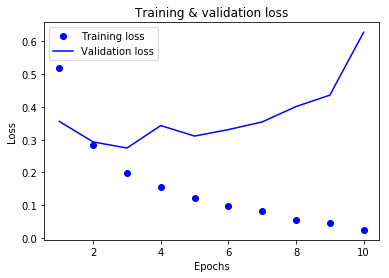

In [29]:
# 绘制训练损失贺验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Training & validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

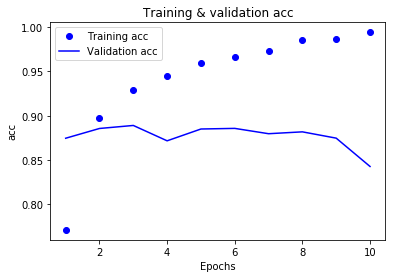

In [30]:
# 绘制训练精度和验证集的精度
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training & validation acc")
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()


### 使用训练好的网络在新数据上生成预测结果

训练好网络之后，你希望将其用于实践。你可以用 predict 方法来得到评论为正面的可能性大小。

In [54]:
model.predict(x_test)

array([[0.04655498],
       [0.9999939 ],
       [0.874963  ],
       ...,
       [0.02852154],
       [0.02422509],
       [0.70364726]], dtype=float32)

### 小结

- 通常需要对原始数据进行大量预处理，以便将其转换为张量输入到神经网络中。单词序列可以编码为二进制向量，但也有其他编码方式。
- 带有 relu 激活的 Dense 层堆叠，可以解决很多种问题（包括情感分类），你可能会经常用到这种模型。
- 对于二分类问题（两个输出类别），网络的最后一层应该是只有一个单元并使用 sigmoid激活的 Dense 层，网络输出应该是 0~1 范围内的标量，表示概率值。
- 对于二分类问题的 sigmoid 标量输出，你应该使用 binary_crossentropy 损失函数。
- 无论你的问题是什么，rmsprop 优化器通常都是足够好的选择。这一点你无须担心。
- 随着神经网络在训练数据上的表现越来越好，模型最终会过拟合，并在前所未见的数据上得到越来越差的结果。一定要一直监控模型在训练集之外的数据上的性能。